<a href="https://colab.research.google.com/github/rajanpandi/dvd_data/blob/main/RNN_lstm_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import pandas as pd

In [87]:
df=pd.read_csv("/content/combine1_data.csv")

In [88]:
pd.set_option('display.max_columns',None)

In [89]:
df.head(1)

,category_id,name,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,inventory_id,store_id,rental_id,rental_date,customer_id,return_date,staff_id,amount,payment_id,payment_date,actor_id,first_name,last_name,name-2
0,11.0,Horror,749.0,Rules Human,A Beautiful Epistle of a Astronaut And a Stude...,2006.0,1.0,6.0,4.99,153.0,19.99,R,3419.0,1.0,1520.0,2005-06-15 23:57:20,341.0,2005-06-24 23:46:20,1.0,7.99,17503.0,2007-02-15 22:25:46.996577,161.0,Harvey,Hope,English


In [90]:
df1=df[["rental_date","category_id","rating","inventory_id","store_id","customer_id","actor_id"]]

In [91]:
df1.head(1)

,rental_date,category_id,rating,inventory_id,store_id,customer_id,actor_id
0,2005-06-15 23:57:20,11.0,R,3419.0,1.0,341.0,161.0


In [92]:
df1["rental_date"] = pd.to_datetime(df1["rental_date"]).dt.strftime('%Y-%m-%d')


<ipython-input-92-aff0d650287d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["rental_date"] = pd.to_datetime(df1["rental_date"]).dt.strftime('%Y-%m-%d')


In [93]:
df1.isnull().sum()

,0
rental_date,231
category_id,5
rating,5
inventory_id,221
store_id,221
customer_id,231
actor_id,45


In [94]:
df1.dropna(inplace=True)

<ipython-input-94-e0e758ddcf8a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)


In [95]:
df1.duplicated().sum()

24

In [96]:
df1.drop_duplicates(inplace=True)

<ipython-input-96-1788250b656d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop_duplicates(inplace=True)


In [97]:
df1.head(1)

,rental_date,category_id,rating,inventory_id,store_id,customer_id,actor_id
0,2005-06-15,11.0,R,3419.0,1.0,341.0,161.0


In [73]:
# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()

In [74]:
# for i in df1.columns:
#   df1[i]=le.fit_transform(df1[i])

<ipython-input-74-83fc323049a1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[i]=le.fit_transform(df1[i])
<ipython-input-74-83fc323049a1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[i]=le.fit_transform(df1[i])
<ipython-input-74-83fc323049a1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

In [98]:
df1["rating"].unique()

array(['R', 'PG', 'G', 'PG-13', 'NC-17'], dtype=object)

In [99]:
assign={"G":1,"PG":2,"PG-13":3,"R":4,"NC-17":5}

In [100]:
df1["rating"]=df1["rating"].map(assign)

<ipython-input-100-d1f778fc82e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["rating"]=df1["rating"].map(assign)


In [101]:
df1.head(1)

,rental_date,category_id,rating,inventory_id,store_id,customer_id,actor_id
0,2005-06-15,11.0,4,3419.0,1.0,341.0,161.0


In [102]:
train_dates=df1["rental_date"]

In [108]:
train_dates.head(1)

,rental_date
0,2005-06-15


In [112]:
# Assuming train_dates is a Series
train_dates_df = train_dates.to_frame()

# Optionally, rename the column if needed
train_dates_df.columns = ['rental_date']



In [113]:
train_dates_df['rental_date'] = pd.to_datetime(train_dates_df['rental_date'], format='%Y-%m-%d')


In [114]:
train_dates_df

,rental_date
0,2005-06-15
1,2005-06-15
2,2005-06-15
3,2005-06-15
4,2005-06-15
...,...
88265,2005-05-30
88266,2005-05-30
88267,2005-05-30
88268,2005-05-30


In [115]:
df1.shape

(87980, 7)

In [116]:
cols=list(df1)[1:6]

In [117]:
df1_for_training=df1[cols]

In [118]:
df1_for_training

,category_id,rating,inventory_id,store_id,customer_id
0,11.0,4,3419.0,1.0,341.0
1,11.0,4,3419.0,1.0,341.0
2,11.0,4,3419.0,1.0,341.0
3,11.0,4,3419.0,1.0,341.0
4,11.0,4,3419.0,1.0,341.0
...,...,...,...,...,...
88265,1.0,1,4427.0,1.0,85.0
88266,1.0,1,4427.0,1.0,85.0
88267,1.0,1,4427.0,1.0,85.0
88268,1.0,1,4427.0,1.0,85.0


In [119]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [120]:
scaler=scaler.fit(df1_for_training)
df1_for_training_scaled=scaler.transform(df1_for_training)

In [121]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM,Dense
from matplotlib import pyplot as plt
import seaborn as sns

In [122]:
df1_for_training_scaled

array([[ 0.56613029,  0.69930517,  0.84954053, -1.01708154,  0.25435651],
       [ 0.56613029,  0.69930517,  0.84954053, -1.01708154,  0.25435651],
       [ 0.56613029,  0.69930517,  0.84954053, -1.01708154,  0.25435651],
       ...,
       [-1.56143178, -1.47152232,  1.61244298, -1.01708154, -1.23183946],
       [-1.56143178, -1.47152232,  1.61244298, -1.01708154, -1.23183946],
       [-1.56143178, -1.47152232,  1.61244298, -1.01708154, -1.23183946]])

In [123]:
trainX=[]
trainY=[]

In [124]:
trainY

[]

In [125]:
n_future=1
n_past=14

In [126]:
for i in range(n_past,len(df1_for_training_scaled)-n_future+1):
  trainX.append(df1_for_training_scaled[i-n_past:i,0:df1_for_training.shape[1]])
  trainY.append(df1_for_training_scaled[i+n_future-1:i+n_future,0])

trainX,trainY=np.array(trainX),np.array(trainY)

print("trainX shape =={}.".format(trainX.shape))
print("trainY shape =={}.".format(trainY.shape))

trainX shape ==(87966, 14, 5).
trainY shape ==(87966, 1).


In [127]:
trainX.shape

(87966, 14, 5)

In [128]:
model=Sequential()
model.add(LSTM(64,activation="relu",input_shape=(trainX.shape[1],trainX.shape[2]),return_sequences=True))
model.add(LSTM(32,activation="relu",return_sequences=False))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer="adam",loss="mse")
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 14, 64)              │          17,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,369 (118.63 KB)

 Trainable params: 30,369 (118.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense

# # Define the model
# model = Sequential()
# model.add(LSTM(64, activation="relu", input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
# model.add(LSTM(32, activation="relu", return_sequences=False))
# model.add(Dense(trainY.shape[1]))

# # Compile the model
# model.compile(optimizer="adam", loss="mse")

# # Print the model summary
# model.summary()


NameError: name 'trainX' is not defined

In [129]:
result=model.fit(trainX,trainY,epochs=5,validation_split=.2,verbose=1)

Epoch 1/5
2200/2200 ━━━━━━━━━━━━━━━━━━━━ 46s 19ms/step - loss: 0.4037 - val_loss: 0.3257
Epoch 2/5
2200/2200 ━━━━━━━━━━━━━━━━━━━━ 39s 18ms/step - loss: 0.3198 - val_loss: 0.3204
Epoch 3/5
2200/2200 ━━━━━━━━━━━━━━━━━━━━ 39s 18ms/step - loss: 0.3180 - val_loss: 0.3243
Epoch 4/5
2200/2200 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - loss: 0.3148 - val_loss: 0.3186
Epoch 5/5
2200/2200 ━━━━━━━━━━━━━━━━━━━━ 38s 17ms/step - loss: 0.3092 - val_loss: 0.3157


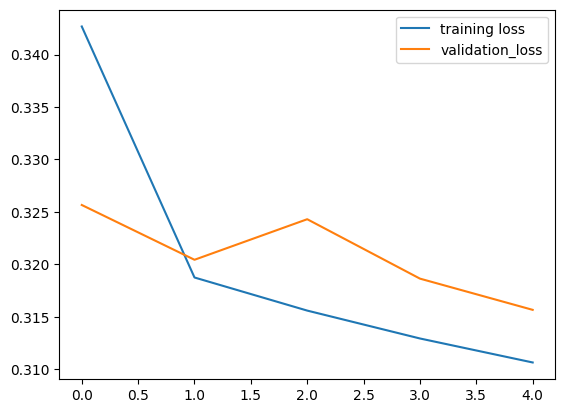

In [130]:
plt.plot(result.history["loss"],label="training loss")
plt.plot(result.history["val_loss"],label="validation_loss")
plt.legend()

In [131]:
n_future=30
forecast_period_dates=pd.date_range(list(train_dates)[-1],periods=n_future,freq='1d').tolist()

In [132]:
forecast=model.predict(trainX[-n_future:])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


In [133]:
forecast_copies=np.repeat(forecast,df1_for_training.shape[1],axis=-1)
y_pred_future=scaler.inverse_transform(forecast_copies)[:,0]

In [134]:
y_pred_future[:5]

array([ 7.5020123,  7.50701  ,  7.51208  ,  7.517785 , 16.866072 ],
      dtype=float32)

In [136]:
y_pred_full_numbers = np.round(y_pred_future).astype(int)

# Convert to DataFrame
df_pred = pd.DataFrame(y_pred_full_numbers, columns=['Predicted Values'])
df_pred[:5]

,Predicted Values
0,8
1,8
2,8
3,8
4,17
